In [1]:
%matplotlib inline

In [15]:
import requests
import json
import pandas as pd
import csv
import matplotlib.pyplot as plt

from config import nrel_key

In [3]:
fuel = "ELEC"
file_format = "csv"
access = "public"
#country = "US"

params = {
    "api_key": nrel_key,
    "fuel_type": fuel,
    "access": access
    }

base_url = f"https://developer.nrel.gov/api/alt-fuel-stations/v1.json?{params}"


response = requests.get(base_url, params=params).json()
#print(json.dumps(response,indent=4, sort_keys=True))

df = pd.DataFrame(response["fuel_stations"])
df

,access_code,access_days_time,access_detail_code,cards_accepted,date_last_confirmed,expected_date,fuel_type_code,groups_with_access_code,id,open_date,...,rd_blends_fr,rd_blended_with_biodiesel,rd_max_biodiesel_level,access_days_time_fr,intersection_directions_fr,bd_blends_fr,groups_with_access_code_fr,ev_pricing_fr,ev_network_ids,federal_agency
0,public,5:30am-9pm; pay lot,None,None,2023-01-10,None,ELEC,Public,1523,1995-08-30,...,None,None,None,None,None,None,Public,None,NaN,NaN
1,public,24 hours daily,None,None,2022-09-14,None,ELEC,Public,1583,1996-10-15,...,None,None,None,None,None,None,Public,None,NaN,NaN
2,public,24 hours daily,None,None,2023-01-10,None,ELEC,Public,6355,1997-07-30,...,None,None,None,None,None,None,Public,None,NaN,NaN
3,public,Dealership business hours,CALL,None,2021-12-09,None,ELEC,Public - Call ahead,6405,2012-12-11,...,None,None,None,None,None,None,Public - Appeler à l'avance,None,NaN,NaN
4,public,6am-12am daily,None,None,2020-02-06,None,ELEC,Public,6425,1997-08-30,...,None,None,None,None,None,None,Public,None,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54684,public,24 hours daily,None,None,2023-02-07,None,ELEC,Public,253438,2023-02-07,...,None,None,None,None,None,None,Public,None,"{'station': ['USCPIL13423691'], 'posts': ['227...",NaN
54685,public,24 hours daily,None,None,2023-02-07,None,ELEC,Public,253439,2023-02-07,...,None,None,None,None,None,None,Public,None,"{'station': ['USCPIL13424741'], 'posts': ['227...",NaN
54686,public,24 hours daily,None,None,2023-02-07,None,ELEC,Public,253440,2023-02-07,...,None,None,None,None,None,None,Public,None,"{'station': ['USCPIL13424751'], 'posts': ['227...",NaN
54687,public,24 hours daily,None,None,2023-02-07,None,ELEC,Public,253444,2023-02-07,...,None,None,None,None,None,None,Public,None,"{'station': ['3891'], 'posts': ['52566A*1', '5...",NaN


In [4]:
df.to_csv(r'export.csv')

In [5]:
df['country'].unique()

array(['US'], dtype=object)

In [6]:
list(df.columns)

['access_code',
 'access_days_time',
 'access_detail_code',
 'cards_accepted',
 'date_last_confirmed',
 'expected_date',
 'fuel_type_code',
 'groups_with_access_code',
 'id',
 'open_date',
 'owner_type_code',
 'status_code',
 'restricted_access',
 'station_name',
 'station_phone',
 'updated_at',
 'facility_type',
 'geocode_status',
 'latitude',
 'longitude',
 'city',
 'intersection_directions',
 'plus4',
 'state',
 'street_address',
 'zip',
 'country',
 'bd_blends',
 'cng_dispenser_num',
 'cng_fill_type_code',
 'cng_psi',
 'cng_renewable_source',
 'cng_total_compression',
 'cng_total_storage',
 'cng_vehicle_class',
 'e85_blender_pump',
 'e85_other_ethanol_blends',
 'ev_connector_types',
 'ev_dc_fast_num',
 'ev_level1_evse_num',
 'ev_level2_evse_num',
 'ev_network',
 'ev_network_web',
 'ev_other_evse',
 'ev_pricing',
 'ev_renewable_source',
 'hy_is_retail',
 'hy_pressures',
 'hy_standards',
 'hy_status_link',
 'lng_renewable_source',
 'lng_vehicle_class',
 'lpg_primary',
 'lpg_nozzle_ty

In [7]:
df_cleaned = df[["access_code","state",'zip','id']]

df_cleaned.head()

,access_code,state,zip,id
0,public,CA,90015,1523
1,public,CA,91731,1583
2,public,CA,92037,6355
3,public,CA,91343,6405
4,public,CA,92503,6425


In [8]:
df_cleaned['state'].unique()

array(['CA', 'VT', 'WA', 'OR', 'IL', 'ID', 'TX', 'FL', 'WI', 'IA', 'AZ',
       'MD', 'NJ', 'NY', 'SC', 'CT', 'OH', 'WV', 'MO', 'UT', 'KS', 'MA',
       'CO', 'IN', 'MI', 'LA', 'NC', 'VA', 'TN', 'AL', 'GA', 'HI', 'MN',
       'NV', 'AR', 'RI', 'PA', 'OK', 'DC', 'ME', 'NH', 'KY', 'NE', 'MS',
       'SD', 'DE', 'NM', 'MT', 'ND', 'WY', 'AK', 'PR', 'ON', 'QC', None,
       'KA'], dtype=object)

In [9]:
state_df = df_cleaned.groupby(['state']).count()['id']

print(state_df)

state
AK       60
AL      271
AR      225
AZ      985
CA    15058
CO     1825
CT      560
DC      287
DE      151
FL     2932
GA     1684
HI      382
IA      312
ID      119
IL     1292
IN      399
KA        1
KS      474
KY      240
LA      193
MA     2515
MD     1379
ME      415
MI     1152
MN      603
MO     1076
MS      101
MT      100
NC     1161
ND       82
NE      220
NH      183
NJ      955
NM      244
NV      526
NY     3550
OH     1258
OK      323
ON        8
OR     1030
PA     1355
PR       33
QC        2
RI      307
SC      433
SD       75
TN      668
TX     2619
UT      799
VA     1231
VT      356
WA     1793
WI      480
WV      120
WY       85
Name: id, dtype: int64


In [10]:
zip_df = df_cleaned.groupby(['zip']).count()['id']

print(zip_df)
zip_df.to_csv(r'zip.csv')


zip
00214    1
00612    1
00662    1
00680    1
00716    1
        ..
L0P1N    1
L2G3X    2
M1B 2    1
M1V0A    1
P0K 1    1
Name: id, Length: 10001, dtype: int64


In [11]:
ev_registration_path = "resources/ev_registration_by_state.csv"

registration_data = pd.read_csv(ev_registration_path)

registration_data.head()

,State Name,state,Registration Count
0,Alabama,AL,4750.0
1,Alaska,AK,1290.0
2,Arizona,AZ,40740.0
3,Arkansas,AR,2390.0
4,California,CA,563070.0


In [12]:
df_complete = pd.merge(state_df, registration_data, how = "left", on=["state"])

df_complete.rename(columns = {"id":"Number of EV Chargers"},inplace=True)

df_complete.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55 entries, 0 to 54
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   state                  55 non-null     object 
 1   Number of EV Chargers  55 non-null     int64  
 2   State Name             51 non-null     object 
 3   Registration Count     51 non-null     float64
dtypes: float64(1), int64(1), object(2)
memory usage: 2.1+ KB


In [13]:
df_complete['Registration Count'] = pd.to_numeric(df_complete['Registration Count'])

df_complete.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55 entries, 0 to 54
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   state                  55 non-null     object 
 1   Number of EV Chargers  55 non-null     int64  
 2   State Name             51 non-null     object 
 3   Registration Count     51 non-null     float64
dtypes: float64(1), int64(1), object(2)
memory usage: 2.1+ KB


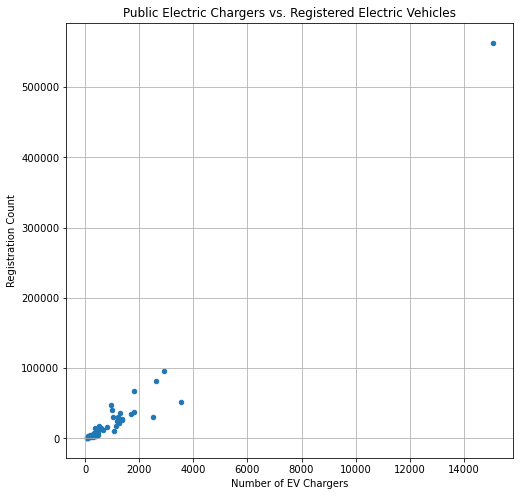

In [16]:
df_complete.plot(kind="scatter", x="Number of EV Chargers", y="Registration Count", grid=True, figsize=(8,8),
              title="Public Electric Chargers vs. Registered Electric Vehicles")
plt.show()